In [2]:
import numpy as np
from keras.datasets import cifar10
#Vamos a analizar el dataset de cifar 10 importado de keras
cifar=cifar10.load_data()
(x_train,y_train),(x_test,y_test)=cifar
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)
#Exploramos las dimensiones, los pixeles y los datos de prueba


170498071/170498071 [==============================] - 11s 0us/step
(50000, 32, 32, 3)
(10000, 32, 32, 3)
(50000, 1)
(10000, 1)


Normalizamos los datos de entrada para escalar los valores de píxeles y luego aplicar técnicas onehot

In [3]:
from tensorflow.keras.utils import to_categorical
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train = x_train / 255
x_test = x_test / 255
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)
num_classes = y_test.shape[1]

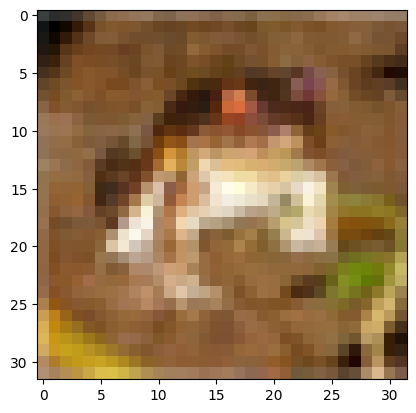

In [4]:
import matplotlib.pyplot as plt
plt.figure()
plt.imshow(x_train[0])
#Este método para ver imágenes

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
modelo=Sequential()
#Creamos un modelo secuencial
modelo.add(Flatten(input_shape=(32, 32, 3)))
#Aquí aplanamos con 3 capas de 32 x 32, que es el tipo de cifar, como vimos con el shape
modelo.add(Dense(128,activation='relu'))
#Usamos una capa dense con activación relu de 128 neuronas
modelo.add(Dense(10,activation='softmax'))
#Usamos capa de salida dense con 10 neuronas(una por clase) con activacion softmax
modelo.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
#Compilamos utilizando como optimizador adam como función de pérdida categorical_crossentropy y métrica de exactitud
modelo.fit(x_train,y_train,epochs=20)

Epoch 1/20
1563/1563 [==============================] - 11s 6ms/step - loss: 1.9056 - accuracy: 0.3145
Epoch 2/20
1563/1563 [==============================] - 10s 6ms/step - loss: 1.7443 - accuracy: 0.3772
Epoch 3/20
1563/1563 [==============================] - 10s 7ms/step - loss: 1.6911 - accuracy: 0.3964
Epoch 4/20
1563/1563 [==============================] - 11s 7ms/step - loss: 1.6523 - accuracy: 0.4111
Epoch 5/20
1563/1563 [==============================] - 11s 7ms/step - loss: 1.6287 - accuracy: 0.4175
Epoch 6/20
1563/1563 [==============================] - 10s 7ms/step - loss: 1.6034 - accuracy: 0.4257
Epoch 7/20
1563/1563 [==============================] - 9s 6ms/step - loss: 1.5916 - accuracy: 0.4298
Epoch 8/20
1563/1563 [==============================] - 10s 7ms/step - loss: 1.5775 - accuracy: 0.4397
Epoch 9/20
1563/1563 [==============================] - 13s 8ms/step - loss: 1.5649 - accuracy: 0.4423
Epoch 10/20
1563/1563 [==============================] - 15s 10ms/step - l

In [7]:
#Vamos a probar que tal con una capa Dense más y añadir a la otra hasta 256 neuronas
modelo=Sequential()
#Creamos un modelo secuencial
modelo.add(Flatten(input_shape=(32, 32, 3)))
#Aquí aplanamos con 3 capas de 32 x 32, que es el tipo de cifar, como vimos con el shape
modelo.add(Dense(512,activation='relu'))
#Usamos una capa dense con activación relu de 512 neuronas
modelo.add(Dense(256,activation='relu'))
#Usamos una capa dense con activación relu de 256 neuronas
modelo.add(Dense(128,activation='relu'))
#Usamos una capa dense con activación relu de 128 neuronas
modelo.add(Dense(10,activation='softmax'))
#Usamos capa de salida dense con 10 neuronas(una por clase) con activacion softmax
modelo.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
#Compilamos utilizando como optimizador adam como función de pérdida categorical_crossentropy y métrica de exactitud
modelo.fit(x_train,y_train,epochs=40)
#Aumentamos a 40 epochs a ver si acierta mas

Epoch 1/40
1563/1563 [==============================] - 40s 25ms/step - loss: 1.8656 - accuracy: 0.3246
Epoch 2/40
1563/1563 [==============================] - 33s 21ms/step - loss: 1.6784 - accuracy: 0.3950
Epoch 3/40
1563/1563 [==============================] - 34s 22ms/step - loss: 1.5949 - accuracy: 0.4290
Epoch 4/40
1563/1563 [==============================] - 34s 22ms/step - loss: 1.5420 - accuracy: 0.4487
Epoch 5/40
1563/1563 [==============================] - 34s 22ms/step - loss: 1.5036 - accuracy: 0.4639
Epoch 6/40
1563/1563 [==============================] - 34s 22ms/step - loss: 1.4690 - accuracy: 0.4741
Epoch 7/40
1563/1563 [==============================] - 34s 22ms/step - loss: 1.4455 - accuracy: 0.4827
Epoch 8/40
1563/1563 [==============================] - 34s 22ms/step - loss: 1.4168 - accuracy: 0.4921
Epoch 9/40
1563/1563 [==============================] - 34s 21ms/step - loss: 1.3959 - accuracy: 0.4997
Epoch 10/40
1563/1563 [==============================] - 34s 22m

Cómo podemos comprobar añadiendo 2 capas más sube bastante la precisión del modelo, aunque esta fiabilidad no es mucha, habría que jugar mas con optimizadores, función de pérdida..

313/313 [==============================] - 2s 8ms/step


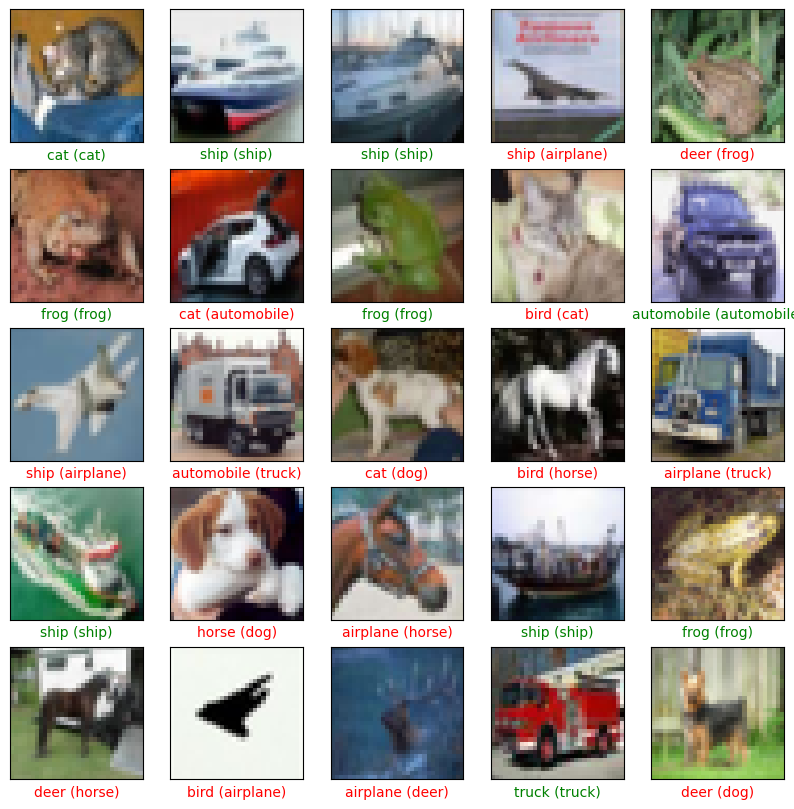

In [10]:
#Vamos a ver que precisión tiene el modelo para predecir
predictions = modelo.predict(x_test)
#Tomamos los datos de prueba
class_names = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
#Introducimos los nombres de las clases que hay
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid('off')
    plt.imshow(x_test[i], cmap=plt.cm.binary)
    predicted_label = predictions[i]
    true_label = y_test[i]
    if predicted_label.argmax() == true_label.tolist().index(1.):
      color = 'green'
    else:
      color = 'red'
    plt.xlabel("{} ({})".format(class_names[predicted_label.argmax()],
                                  class_names[true_label.tolist().index(1.)]),
                                  color=color)
#Tomamos 25 ejemplos que se muestran de 5 en 5 y ponemos que los que acierte los ponga de color verde, sino de color rojo